### Feature Extraction using VGG16 for Image Analysis

The code is extracting features from images using a pre-trained VGG16 model. It iterates through a directory of images, loads each image, resizes it, preprocesses it, and passes it through the VGG16 model to obtain a feature vector. The extracted features are stored in a dictionary, where each image is associated with its corresponding feature vector. These features can be used for various tasks such as image captioning, image retrieval, or any other application that requires high-level image representations.

In [41]:
import numpy as np
from os import listdir
from PIL import Image
from pickle import dump
import matplotlib.pyplot as plt
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.models import Model

# Function to extract features from each photo in the directory
def extract_image_features(image_directory):
    # Load the VGG16 model
    base_model = VGG16()
    
    # Create a new model without the last layer
    feature_extractor = Model(inputs=base_model.inputs, outputs=base_model.layers[-2].output)
    
    # Print model summary
    print(feature_extractor.summary())
    
    # Create a dictionary to store the extracted features
    features = dict()
    
    # Loop over each photo in the directory
    for image_name in listdir(image_directory):
        # Load an image from file
        image_path = image_directory + '/' + image_name
        image = Image.open(image_path)
        
        # Resize the image to the required input size of VGG16 (224x224)
        image = image.resize((224, 224))
        
        # Convert the image to a numpy array
        image = np.array(image)
        
        # Reshape the data to match the input shape of the model
        image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
        
        # Preprocess the image for the VGG16 model
        preprocessed_image = preprocess_input(image)
        
        # Extract features using the feature extractor model
        features_vector = feature_extractor.predict(preprocessed_image, verbose=0)
        
        # Get the image ID by removing the file extension
        image_id = image_name.split('.')[0]
        
        # Store the extracted feature vector in the dictionary with the image ID as the key
        features[image_id] = features_vector
        
        print('Processed image: %s' % image_name)
    
    return features

# Set the directory containing the images
image_directory = '/kaggle/input/vr-project2-flicker8k/Flicker8k_Images/Flicker8k_Images'

# Extract features from all images in the directory
extracted_features = extract_image_features(image_directory)

# Print the total number of extracted features
print('Total extracted features: %d' % len(extracted_features))

# Save the extracted features to a file using pickle
dump(extracted_features, open('VGG16_features.pkl', 'wb'))

Model: "model_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_10 (InputLayer)       [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

### Data Preprocessing

### Function to Read Text File

In [1]:
def read_text_file(filename):
    file = open(filename, 'r')
    text = file.read()
    file.close()
    return text

### Function to Extract Image Descriptions

The code reads a text file containing image descriptions. It extracts the image ID and its corresponding description from each line and stores them in a dictionary. Multiple descriptions for the same image ID are grouped together. The code returns the dictionary with the extracted image descriptions.

In [2]:
def extract_image_descriptions(text):
    descriptions = dict()
    for line in text.split('\n'):
        tokens = line.split()
        if len(tokens) < 2:
            continue
        image_id, image_desc = tokens[0], tokens[1:]
        image_id = image_id.split('.')[0]
        image_desc = ' '.join(image_desc)
        if image_id not in descriptions:
            descriptions[image_id] = list()
        descriptions[image_id].append(image_desc)
    return descriptions

### Text Cleaning and Preprocessing of Descriptions

We performed several operations such as removing punctuation, converting words to lowercase, removing short and non-alphabetic words, and rejoining the processed words into cleaned descriptions. This cleaning process prepares the descriptions for further analysis and improves the quality of the text data.

In [3]:
import string

def clean_descriptions(descriptions):
    table = str.maketrans('', '', string.punctuation)
    for key, desc_list in descriptions.items():
        for i in range(len(desc_list)):
            desc = desc_list[i]
            desc = desc.split()
            desc = [word.lower() for word in desc]
            desc = [w.translate(table) for w in desc]
            desc = [word for word in desc if len(word) > 1]
            desc = [word for word in desc if word.isalpha()]
            desc_list[i] = ' '.join(desc)

### Creating Vocabulary from Image Descriptions

This creates a vocabulary from a collection of image descriptions. It iterates over each description in the input, splits it into individual words, and adds them to a set. By doing so, it ensures that only unique words are included in the vocabulary. The resulting set of words represents the vocabulary that encompasses all the words used in the image descriptions.

In [4]:
def create_vocabulary(descriptions):
    all_desc = set()
    for key in descriptions.keys():
        [all_desc.update(d.split()) for d in descriptions[key]]
    return all_desc

### Saving Image Descriptions to File

It takes a dictionary of descriptions as input, where the keys represent the image IDs and the values are lists of corresponding descriptions. It iterates over each image ID and its associated descriptions, concatenates them with a space, and appends them as lines to a list. Then, it joins all the lines with newline characters to create a single string of data.

In [5]:
def save_descriptions_to_file(descriptions, filename):
    lines = list()
    for key, desc_list in descriptions.items():
        for desc in desc_list:
            lines.append(key + ' ' + desc)
    data = '\n'.join(lines)
    file = open(filename, 'w')
    file.write(data)
    file.close()

In [6]:
lemma_token_text = read_text_file('/kaggle/input/vr-project2-flicker8k/Flickr8k_text/Flickr8k_text/Flickr8k.token.txt')
descriptions = extract_image_descriptions(lemma_token_text)
print('No. of loaded descriptions:', len(descriptions))
print()
print('Descriptions for Image id: 1305564994_00513f9a5b')
print(descriptions['1305564994_00513f9a5b'][0])
print(descriptions['1305564994_00513f9a5b'][1])
print(descriptions['1305564994_00513f9a5b'][2])
print(descriptions['1305564994_00513f9a5b'][3])
print(descriptions['1305564994_00513f9a5b'][4])

No. of loaded descriptions: 8092

Descriptions for Image id: 1305564994_00513f9a5b
A man in street racer armor is examining the tire of another racer 's motorbike .
The two racers drove the white bike down the road .
Two motorists are riding along on their vehicle that is oddly designed and colored .
Two people are in a small race car driving by a green hill .
Two people in racing uniforms in a street car .


In [7]:
clean_descriptions(descriptions)
print('Descriptions for Image id: 1305564994_00513f9a5b')
print(descriptions['1305564994_00513f9a5b'][0])
print(descriptions['1305564994_00513f9a5b'][1])
print(descriptions['1305564994_00513f9a5b'][2])
print(descriptions['1305564994_00513f9a5b'][3])
print(descriptions['1305564994_00513f9a5b'][4])

Descriptions for Image id: 1305564994_00513f9a5b
man in street racer armor is examining the tire of another racer motorbike
the two racers drove the white bike down the road
two motorists are riding along on their vehicle that is oddly designed and colored
two people are in small race car driving by green hill
two people in racing uniforms in street car


In [8]:
save_descriptions_to_file(descriptions, 'descriptions.txt')
vocabulary = create_vocabulary(descriptions)
print('Total vocabulary Size:', len(vocabulary))

Total vocabulary Size: 8763


### Function to Load Images identifiers into Set

It extracts the identifiers from each line of the file by splitting the line and taking the first part before the dot. These identifiers are then added to a set to ensure uniqueness. Finally, the function returns the set of identifiers. Essentially, the code reads a file, extracts unique identifiers from each line, and returns them as a set.

In [9]:
def load_identifiers(filename):
    file_data = read_text_file(filename)
    identifiers = set()
    for line in file_data.split('\n'):
        if len(line) > 0:
            identifier = line.split('.')[0]
            identifiers.add(identifier)
    return identifiers

### Loading Cleaned Descriptions for Identifiers

This processes each line of the file by splitting it into tokens. The first token represents the image identifier, and the remaining tokens represent the image description. If the image identifier is present in the provided set of identifiers, the code checks if it is already in the descriptions dictionary. If not, a new list is created for that image identifier. The image description tokens are joined together with the 'startseq' and 'endseq' tokens, forming a complete caption. This caption is appended to the list of descriptions for the respective image identifier. Finally, the descriptions dictionary is returned.

In [10]:
def load_cleaned_descriptions(filename, identifiers):
    file_data = read_text_file(filename)
    descriptions = {}
    for line in file_data.split('\n'):
        caption_tokens = line.split()
        image_id, image_desc = caption_tokens[0], caption_tokens[1:]
        if image_id in identifiers:
            if image_id not in descriptions:
                descriptions[image_id] = []
            desc = 'startseq ' + ' '.join(image_desc) + ' endseq'
            descriptions[image_id].append(desc)
    return descriptions

### Loading Image Features for Identifiers

It reads all the features from the file and then selects only the features corresponding to the specified identifiers. Finally, it returns a dictionary where the identifiers are the keys and the corresponding image features are the values.

In [11]:
from pickle import load

def load_image_features(filename, identifiers):
    all_features = load(open(filename, 'rb'))
    features = {k: all_features[k] for k in identifiers}
    return features

In [12]:
trainImages = load_identifiers('/kaggle/input/vr-project2-flicker8k/Flickr8k_text/Flickr8k_text/Flickr_8k.trainImages.txt')
print('Num of train images in the dataset:', len(trainImages))

train_descriptions = load_cleaned_descriptions('/kaggle/working/descriptions.txt', trainImages)
print('Num of train descriptions:', len(train_descriptions))
print()
print('Descriptions for Image id: 1000268201_693b08cb0e')
train_descriptions['1000268201_693b08cb0e']

Num of train images in the dataset: 6000
Num of train descriptions: 6000

Descriptions for Image id: 1000268201_693b08cb0e


['startseq child in pink dress is climbing up set of stairs in an entry way endseq',
 'startseq girl going into wooden building endseq',
 'startseq little girl climbing into wooden playhouse endseq',
 'startseq little girl climbing the stairs to her playhouse endseq',
 'startseq little girl in pink dress going into wooden cabin endseq']

In [13]:
train_ImageFeatures = load_image_features('/kaggle/input/image-features/features.pkl', trainImages)
print('Num of train Image features:', len(train_ImageFeatures))
print()
print('Feature vector for Image id: 1000268201_693b08cb0e')
print(train_ImageFeatures['1000268201_693b08cb0e'])

Num of train Image features: 6000

Feature vector for Image id: 1000268201_693b08cb0e
[[1.9046047 0.        0.        ... 0.        0.        0.       ]]


### Concatenating Descriptions from a Dictionary

It takes a dictionary of descriptions as input and extracts all the descriptions from it. It iterates over the keys of the dictionary and for each key, it retrieves the list of descriptions associated with that key. It then appends each description to a new list, containing all the descriptions concatenated together. 

In [14]:
def get_all_descriptions(descriptions):
    all_desc = list()
    for key in descriptions.keys():
        [all_desc.append(d) for d in descriptions[key]]
    return all_desc

### Function to create a tokenizer for the caption descriptions

It creates a tokenizer using the caption descriptions provided. It converts the descriptions into a list of lines, then uses the Tokenizer class from the Keras library to fit the tokenizer on the lines of text. The tokenizer learns the vocabulary from the text data, assigning a unique index to each word. Finally, the tokenizer is returned for further use in the caption generation process.

In [15]:
from keras.preprocessing.text import Tokenizer

def create_caption_tokenizer(descriptions):
    lines = get_all_descriptions(descriptions)
    tokenizer = Tokenizer()
    tokenizer.fit_on_texts(lines)
    return tokenizer

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [16]:
caption_tokenizer = create_caption_tokenizer(train_descriptions)
vocab_size = len(caption_tokenizer.word_index) + 1
print('Total Vocabulary Size: %d' % vocab_size)

Total Vocabulary Size: 7579


In [17]:
def calculate_max_length(descriptions):
    max_length = 0
    for key in descriptions.keys():
        for desc in descriptions[key]:
            length = len(desc.split())
            if length > max_length:
                max_length = length
    return max_length

max_length = calculate_max_length(train_descriptions)
print('Maximum Description Length:', max_length)

Maximum Description Length: 34


### Creating Sequences for Image Captioning

This helps in creating sequences for image captioning. It iterates through each description and converts it into a sequence of tokens using the tokenizer. Then, it generates input-output pairs by splitting the sequence into multiple segments. For each segment, it pads the input sequence to the maximum length, encodes the output sequence into a categorical format, and appends the corresponding photo features. Finally, it returns arrays containing the image sequences, input sequences, and output sequences.

In [18]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
import numpy as np

def create_sequences(tokenizer, max_length, descriptions, photo_features, vocab_size):
    image_seq, input_seq, output_seq = list(), list(), list()
    
    for desc in descriptions:
        seq = tokenizer.texts_to_sequences([desc])[0]
        
        for i in range(1, len(seq)):
            in_seq, out_seq = seq[:i], seq[i]
            in_seq = pad_sequences([in_seq], maxlen=max_length)[0]
            out_seq = to_categorical([out_seq], num_classes=vocab_size)[0]
            
            image_seq.append(photo_features)
            input_seq.append(in_seq)
            output_seq.append(out_seq)
    
    return np.array(image_seq), np.array(input_seq), np.array(output_seq)

### Data generator for model training

It generates data in a loop for training a model. It iterates over the descriptions and photos, and for each image, it retrieves the corresponding photo features and generates sequences of image, input, and output data using the create_sequences function. The generated data is yielded as batches, with each batch consisting of input image sequences, input text sequences, and output text sequences.

In [19]:
def generate_data(descriptions, photos, tokenizer, max_length, vocab_size):
    while True:
        for image_id, desc_list in descriptions.items():
            photo_features = photos[image_id][0]
            image_sequences, input_sequences, output_sequences = create_sequences(tokenizer, max_length, desc_list, photo_features, vocab_size)
            yield [image_sequences, input_sequences], output_sequences

### Loading Pre-trained Word2Vec Embeddings and Creating Embedding Matrix

The code loads a pre-trained Word2Vec embeddings from a file and creating an embedding matrix. It first loads the Word2Vec model from the specified file. Then, it initializes an embedding matrix with zeros, with dimensions corresponding to the vocabulary size and the embedding dimension. It iterates over each word in the vocabulary and retrieves its corresponding embedding vector from the Word2Vec model. The embedding vector is then assigned to the corresponding row in the embedding matrix.

In [ ]:
import gensim
import numpy as np
from tensorflow.keras.layers import Embedding

def load_word2vec_embeddings(embeddings_file, embedding_dim, vocab_size):
    word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(embeddings_file, binary=True)
    embedding_matrix = np.zeros((vocab_size, embedding_dim))
    for i in range(vocab_size):
        word = word2vec_model.index_to_key[i]
        embedding_matrix[i] = word2vec_model[word]
    return embedding_matrix

embedding_dim = 300
embeddings_file = '/kaggle/input/google-word2vec/GoogleNews-vectors-negative300.bin'

embedding_matrix = load_word2vec_embeddings(embeddings_file, embedding_dim, vocab_size)

### Captioning Model

We combines image features and caption sequences to generate captions for images. It consists of three main components: a feature extractor for the input image, a sequence model for processing caption sequences, and a decoder for generating the output caption. The feature extractor and sequence model are connected and their outputs are combined in the decoder. The model uses dropout for regularization and dense layers for transforming the features. The caption sequences are embedded using pre-trained word embeddings. The model is compiled with the categorical cross-entropy loss function and the Adam optimizer. 

In [23]:
from tensorflow.keras.layers import Input, Dropout, Dense, Embedding, LSTM, add
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from keras.utils import plot_model

def captioning_model(vocab_size, embedding_dim, max_length, embedding_weights):
    input_image = Input(shape=(4096,))
    image_dropout = Dropout(0.5)(input_image)
    image_dense = Dense(256, activation='relu')(image_dropout)
    
    input_caption = Input(shape=(max_length,))
    caption_embedding = Embedding(vocab_size, embedding_dim, weights=[embedding_weights], input_length=max_length, trainable=False)(input_caption)
    caption_dropout = Dropout(0.5)(caption_embedding)
    caption_lstm = Bidirectional(LSTM(128)(caption_dropout))
    
    decoder_concat = add([image_dense, caption_lstm])
    decoder_dense1 = Dense(256, activation='relu')(decoder_concat)
    output = Dense(vocab_size, activation='softmax')(decoder_dense1)
    
    model = Model(inputs=[input_image, input_caption], outputs=output)
    model.compile(loss='categorical_crossentropy', optimizer='adam')
    
    print(model.summary())
    plt.figure(figsize=(10, 10))
    plot_model(model, to_file='model.png', show_shapes=True)
    
    return model

We initializes the model using a defined architecture and loads pre-trained word embeddings. Then, for each epoch, it generates training data using a data generator, which combines image features and caption sequences. The model is trained using the generated data for one epoch, and the process is repeated for the specified number of epochs. After each epoch, the model is saved with a unique filename.

In [24]:
model = captioning_model(vocab_size, embedding_dim, max_length, embedding_matrix)

num_epochs = 15
steps_per_epoch = len(train_descriptions)
loss_history = []
epoch_history = []

for i in range(num_epochs):
    generator = generate_data(train_descriptions, train_ImageFeatures, caption_tokenizer, max_length, vocab_size)
    history = model.fit_generator(generator, epochs=1, steps_per_epoch=steps_per_epoch, verbose=1)
    model.save('VGG16_Word2Vec_model' + str(i) + '.h5')
    loss_history.append(history.history['loss'][0])
    epoch_history.append(i+1)

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 34)]         0           []                               
                                                                                                  
 input_1 (InputLayer)           [(None, 4096)]       0           []                               
                                                                                                  
 embedding (Embedding)          (None, 34, 200)      1515800     ['input_2[0][0]']                
                                                                                                  
 dropout (Dropout)              (None, 4096)         0           ['input_1[0][0]']                
                                                                                              

/tmp/ipykernel_31/188702376.py:10: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(generator, epochs=1, steps_per_epoch=steps_per_epoch, verbose=1)


6000/6000 [==============================] - 54s 9ms/step - loss: 3.2374


<Figure size 1000x1000 with 0 Axes>

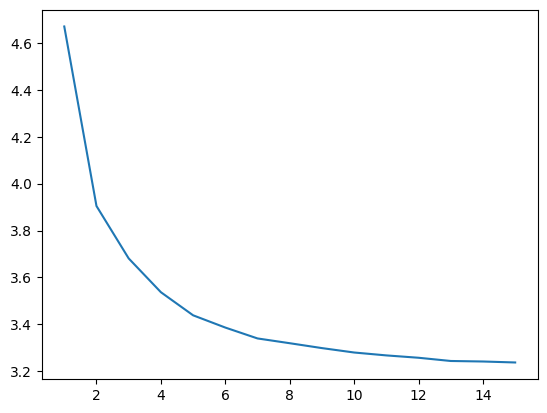

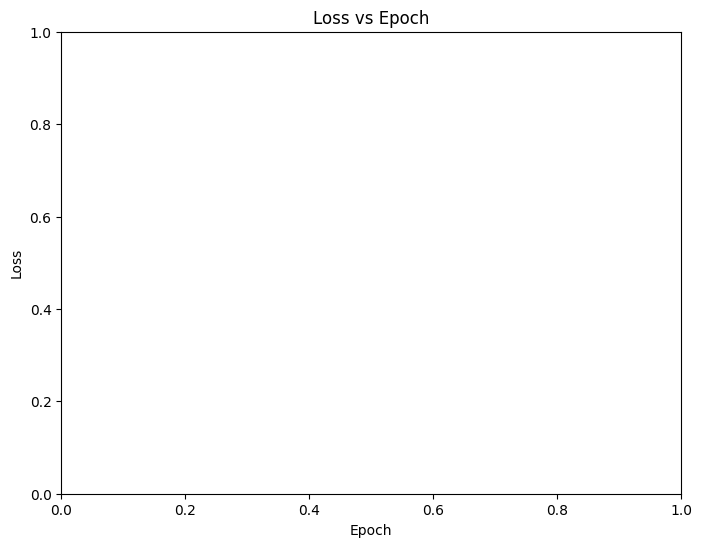

In [25]:
plt.plot(epoch_history, loss_history)
plt.figure(figsize=(8, 6))
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss vs Epoch')
plt.show()

### Word Lookup by Index in Tokenizer

It looks up a word in a tokenizer based on its corresponding index. It iterates over the word-index pairs in the tokenizer's vocabulary and checks if the index matches the given integer. If a match is found, the corresponding word is returned. If no match is found, it returns None.

In [26]:
def get_word_from_id(index, tokenizer):
    for word, idx in tokenizer.word_index.items():
        if idx == index:
            return word
    return None

### Generate Description using Image Captioning Model

It generates a textual description for an image using an image captioning model. It starts with a seed text "startseq" and iteratively predicts the next word based on the image and the previously generated words. The process continues until either the maximum length of the sequence is reached or the model predicts the end of the sequence "endseq". The generated description is then returned.

In [27]:
def generate_description(model, tokenizer, image, max_length):
    current_text = 'startseq'
    for _ in range(max_length):
        sequence = tokenizer.texts_to_sequences([current_text])[0]
        sequence = pad_sequences([sequence], maxlen=max_length)
        prediction = model.predict([image, sequence], verbose=0)
        predicted_word_index = np.argmax(prediction)
        predicted_word = get_word_from_id(predicted_word_index, tokenizer)
        if predicted_word is None:
            break
        current_text += ' ' + predicted_word
        if predicted_word == 'endseq':
            break
    return current_text

### Evaluate Model and Calculate BLEU Score

It evaluate the performance of a captioning model by calculating the BLEU (Bilingual Evaluation Understudy) score. It takes the trained captioning model, descriptions of images, corresponding photos, tokenizer, and maximum caption length as inputs. It generates predicted captions for the images using the model and compares them with the actual reference captions. The BLEU-1, BLEU-2, BLEU-3, and BLEU-4 scores are calculated and printed, representing the similarity between predicted and reference captions at different n-gram levels. A higher BLEU score indicates a better match between the predicted and reference captions.

In [28]:
from nltk.translate.bleu_score import corpus_bleu

def evaluate_model(caption_model, descriptions, imageFeatures, caption_tokenizer, max_length):
    reference_list, predicted_list = list(), list()
    
    for image_id, desc_list in descriptions.items():
        predicted_caption = generate_description(caption_model, caption_tokenizer, imageFeatures[image_id], max_length)
        
        references = [desc.split() for desc in desc_list]
        reference_list.append(references)
        predicted_list.append(predicted_caption.split())
    
    print('BLEU-1: %f' % corpus_bleu(reference_list, predicted_list, weights=(1.0, 0, 0, 0)))
    print('BLEU-2: %f' % corpus_bleu(reference_list, predicted_list, weights=(0.5, 0.5, 0, 0)))
    print('BLEU-3: %f' % corpus_bleu(reference_list, predicted_list, weights=(0.3, 0.3, 0.3, 0)))
    print('BLEU-4: %f' % corpus_bleu(reference_list, predicted_list, weights=(0.25, 0.25, 0.25, 0.25)))

In [29]:
testImages = load_identifiers('/kaggle/input/vr-project2-flicker8k/Flickr8k_text/Flickr8k_text/Flickr_8k.testImages.txt')
print('Num of test test in the dataset:', len(testImages))

test_descriptions = load_cleaned_descriptions('/kaggle/working/descriptions.txt', testImages)
print('Num of test descriptions:', len(test_descriptions))

Num of test test in the dataset: 1000
Num of test descriptions: 1000


In [30]:
test_ImageFeatures = load_image_features('/kaggle/input/image-features/features.pkl', testImages)
print('Num of test Image features:', len(test_ImageFeatures))

Num of test Image features: 1000


In [31]:
from keras.models import load_model

model_path = '/kaggle/working/VGG16_Word2Vec_model14.h5'
model = load_model(model_path)
evaluate_model(model, test_descriptions, test_ImageFeatures, caption_tokenizer, max_length)

BLEU-1: 0.529177
BLEU-2: 0.278808
BLEU-3: 0.189683
BLEU-4: 0.087494


In [32]:
from pickle import dump
dump(caption_tokenizer, open('caption_tokenizer.pkl', 'wb'))

### Image Feature Extraction using VGG16 Model

In [33]:
import numpy as np
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.models import Model
from PIL import Image

def extract_features(filename):
    model = VGG16()
    model = Model(inputs=model.inputs, outputs=model.layers[-2].output)
    image = Image.open(filename)
    image = image.resize((224, 224))
    image = np.array(image)
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
    image = preprocess_input(image)
    feature = model.predict(image, verbose=0)
    return feature

### Image Captioning with Generated Description

553467096/553467096 [==============================] - 9s 0us/step


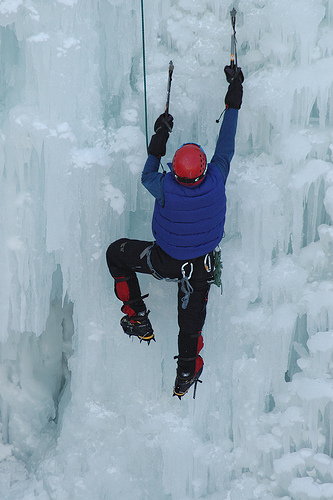

startseq two people are walking on the beach endseq


In [34]:
from PIL import Image
from IPython.display import display

max_length = 34
caption_tokenizer = load(open('caption_tokenizer.pkl', 'rb'))

image_path = '/kaggle/input/vr-project2-flicker8k/Flicker8k_Images/Flicker8k_Images/102455176_5f8ead62d5.jpg'

photo = extract_features(image_path)
description = generate_description(model, caption_tokenizer, photo, max_length)

image = Image.open(image_path)

display(image)
print(description)

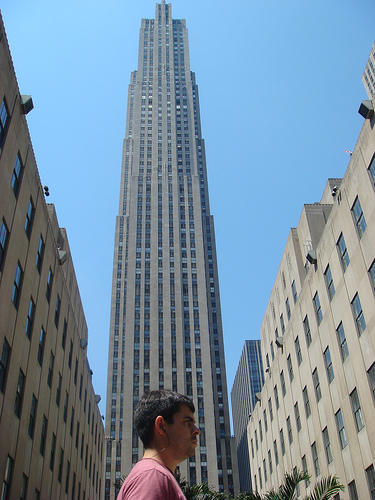

startseq man in black shirt is standing in front of the street endseq


In [35]:
image_path = '/kaggle/input/vr-project2-flicker8k/Flicker8k_Images/Flicker8k_Images/1032460886_4a598ed535.jpg'

photo = extract_features(image_path)
description = generate_description(model, caption_tokenizer, photo, max_length)

image = Image.open(image_path)

display(image)
print(description)

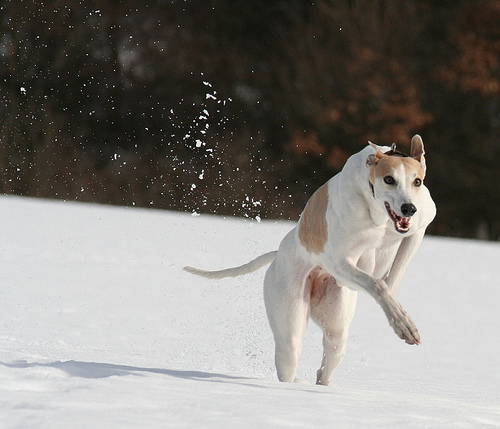

startseq two dogs are playing in the water endseq


In [36]:
image_path = '/kaggle/input/vr-project2-flicker8k/Flicker8k_Images/Flicker8k_Images/101654506_8eb26cfb60.jpg'

photo = extract_features(image_path)
description = generate_description(model, caption_tokenizer, photo, max_length)

image = Image.open(image_path)

display(image)
print(description)

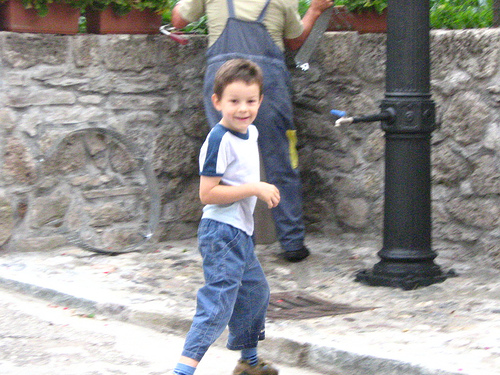

startseq man in black shirt is standing on the street endseq


In [37]:
image_path = '/kaggle/input/vr-project2-flicker8k/Flicker8k_Images/Flicker8k_Images/1015118661_980735411b.jpg'

photo = extract_features(image_path)
description = generate_description(model, caption_tokenizer, photo, max_length)

image = Image.open(image_path)

display(image)
print(description)

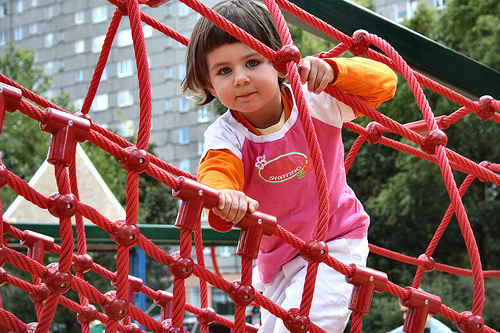

startseq young boy in red shirt is walking on the grass endseq


In [38]:
image_path = '/kaggle/input/vr-project2-flicker8k/Flicker8k_Images/Flicker8k_Images/1007320043_627395c3d8.jpg'

photo = extract_features(image_path)
description = generate_description(model, caption_tokenizer, photo, max_length)

image = Image.open(image_path)

display(image)
print(description)

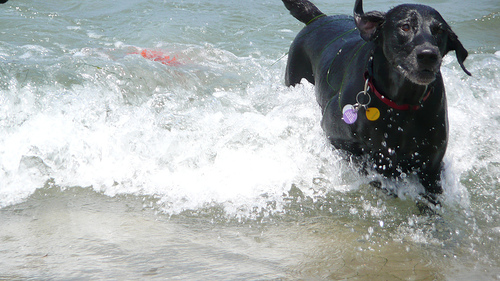

startseq two dogs are playing in the water endseq


In [39]:
image_path = '/kaggle/input/vr-project2-flicker8k/Flicker8k_Images/Flicker8k_Images/1022975728_75515238d8.jpg'

photo = extract_features(image_path)
description = generate_description(model, caption_tokenizer, photo, max_length)

image = Image.open(image_path)

display(image)
print(description)